# Problem 1: Data with R

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R

library(tidyverse)

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ✔ ggplot2 3.2.1     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

  warnings.warn(x, RRuntimeWarning)
/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

  warnings.warn(x, RRuntimeWarning)


In [3]:
%%R
# make sure to get your data in the same folder, next to the notebook file
# so that this will run!


dat <- read_csv('classification_data.csv')

/opt/conda/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Parsed with column specification:
cols(
  X = col_double(),
  label = col_double()
)

  warnings.warn(x, RRuntimeWarning)


[1] "NULL"
[1] "NULL"
Observations: 1,000
Variables: 2
$ X     <dbl> 2.457573746, 1.545726716, 5.510643708, 0.118720645, 7.508892796…
$ label <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


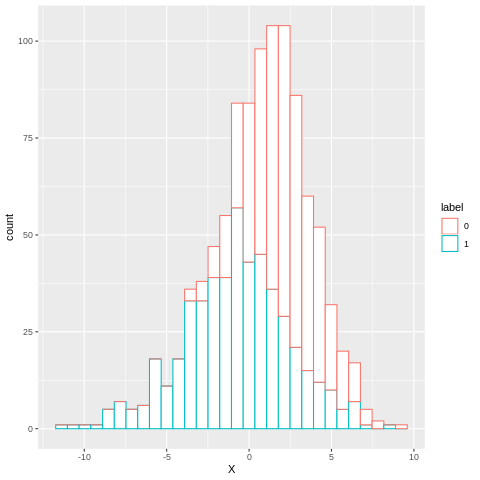

In [95]:
%%R
#dat$label

# Your data consists of an "X" column and a "label" column
# Use ggplot to plot a kernel density estimate of each label (overlayed on the same plot)
# hint: Don't forget to make sure the labels are factors!
# hint hint: Read the errors carefully! 
# Read the documentation for parse_factor (readr) if confused!

print(class(dat$labels[2]))
temp <-dat %>% mutate(label = as.character(label)) %>%
            mutate(label = parse_factor(label,include_na=TRUE))
print(class(dat$labels[2]))

glimpse(temp)

ggplot(temp, aes(x=X,color=label)) + geom_histogram(fill="white")


# Problem 2: Using Classes in Python

In this problem, you will use the classes in the following cell. **You do not need to modify the classes or touch the code in the following cell in any way!**

In [5]:
from abc import ABC, abstractmethod
from math import sqrt

def smart_zip(a,b):
    try:
        return zip(a, b)
    except TypeError:
        return zip([a], [b])

class AbstractKNeighbors(ABC):
    def __init__(self, K):
        self.K = K

    def fit(self, X, y):
        """ Train the model!

        X should be a list of data points
        y should be a list of labels
        """
        self.X = X
        self.y = y
        return self

    @abstractmethod
    def _make_prediction(self, labels):
        pass

    def predict(self, new_x):
        """Find the nearest K neighbors
        
        new_x should be a single data point
        """

        dists = [sqrt(sum(([(i-j)**2 for i,j in smart_zip(x,new_x)])))
                 for x in self.X]
        sorted_neighbors = sorted(enumerate(dists),
                                  key=lambda t: t[1])
        labels = [self.y[i] for i,_ in sorted_neighbors]
        return self._make_prediction(labels)


class KNearestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[:self.K])/self.K
        return round(avg)

class KFurthestNeighbors(AbstractKNeighbors):
    def _make_prediction(self, labels):
        avg = sum(labels[-self.K:])/self.K
        return round(1 - avg)

In [16]:
from csv import reader

with open('classification_data.csv', 'r') as f:
    dat = list(reader(f))[1:]
    dat = [[float(x), int(label)] for x,label in dat]

## Problem 2.1: Shuffling!

In [26]:
# In your data, "X" is a data point that is nothing more than
# a single number. 
# Shuffle your data into a random order (use random.shuffle!)
import random
random.shuffle(dat)

[2.700335147126782, 0]

In [18]:
# If you shuffled your data, this test should pass
# (i.e. not throw an error)

assert(sum([label for x,label in dat[:50]]) != 0)

## Problem 2.2: Splitting!

In [27]:
# Split your data, which is now a list, into 2 sublists:
# "train" and "test"
# The "train" group should have 700 elements
# The test group should have 300 elements
# Each group should have the same format as the original data
train = dat[0:700]
test = dat[700:1000]
print(len(train),len(test))

700 300


In [34]:
# Now you will need to make another split, within the groups!
# For each group ("train" and "test") split the X's from the labels.
train_x = [pair[0] for pair in train]
train_y = [pair[1] for pair in train]

test_x = [pair[0] for pair in test]
test_y = [pair[1] for pair in test]


[4.010844725698379, -3.5495528330693578, 1.4217043106622305, 0.5081307515000735, 1.5779077677252262, 1.6041162885240914, 3.6033774483309773, -1.3550020384763122, 2.4650401245997813, -2.086813662757523, 0.9633122641416179, 3.851065673461741, 2.039209604757846, 6.073744644450936, -0.803102988962689, 2.0977555011411138, 4.470194808398365, -3.0821537836372768, -7.683117159761189, 1.4710002487477172, 2.1641980428645016, -4.073443636482749, -0.7719882519639125, -0.3965983510169768, 2.037146236535045, -3.5486551041379935, 1.6647431750633035, 3.3275658257360003, 3.4494075114993477, 5.465960747113644, 1.167770349614657, 3.681841009894776, 2.8580869794262522, 1.0564829647915244, 2.606467125979327, -3.1837714688343874, -2.818900130973865, 2.358544270246075, 3.9770533472361205, 1.9203409843761932, 2.6076652013525248, 0.9034389723246239, 2.738383515220932, -0.671606128754862, -1.885272211588096, 0.9980292150709729, 1.003073067553923, -2.182004305819434, 0.5402481667590708, -2.0880856199145157, -2.6

## Problem 2.3: Testing models!

In [53]:
import numpy as np# For each model: 
# 1. Create an instance the class, with constructor parameters: K=5
knn= KNearestNeighbors(K=5)


kfn = KFurthestNeighbors(K=5)
# 2. Train the instance on the "train" groups X's and labels (y's)
knn.fit(train_x,train_y)

kfn.fit(train_x,train_y)

# 3. Test how well the instance does: 
#    A. Use the trained instance to predict the label of each "X" in the "test" group
knn_pred = []
kfn_pred = []
for point in test_x[0:10]:
    knn_pred += [knn.predict(point)]
    kfn_pred += [kfn.predict(point)]
#    B. Use your "test" labels to see if the predicted label is equal the true label
knn_diff = 0
kfn_diff = 0
for i in range(0,len(knn_pred)):
    knn_diff += abs(knn_pred[i]-test_y[i])
    kfn_diff += abs(kfn_pred[i]-test_y[i])
print(knn_diff,kfn_diff)

4 2


In [ ]:
# Compare the two classes of models!
# Kfn works better! 